# Detecting Grape Disease with CNN (EDA)

## Introduction
In this project, I developed a machine learning model to classify three common types of grape diseases. 

Accurate and early detection of plant diseases is crucial for maintaining crop health and optimizing yields. Leveraging image data, my model focuses on distinguishing between healthy grape plants and those affected by three common diseases. By analyzing key features such as color distribution and pixel intensity patterns, my model aims to provide an accurate and efficient way to identify and manage grape diseases before they significantly impact production.

## Problem
### How accurately can grapevine diseases be classified into specific categories (three disease classes and one healthy class) using image data?

## Solution:
### Build a Convolutional Neural Network to Correctly Classify 3 Common Types of Diseases in Grape Vines

## Use Cases:

- Early Disease Detection
- Improved Crop Quality
- Cost Savings

## Stakeholders:

- Vineyard Managers and Grape Growers
- Winemakers
- Novice Grape Growers

## Baseline: 15% (Smallest Class %)

## Goal: 90% Accuracy

## 1. Configuration

### 1.1 Basic Imports

In [2]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
from collections import Counter
from PIL import Image

### 1.2 Importing Tensorflow

In [3]:
import tensorflow as tf
from tensorflow.keras import models, layers

### 1.3 Constants

In [4]:
# Constants
batch_size = 32
image_size = 256

### 1.4 Structure

**Input** -> (Image of Leaf) <br>
**Classificaton** - > (Class_1, Class_2, Class_3, Class_4)<br>
**Output** -> (Leaf_Blight, Black_Measles, Black_Rot, Healthy) <br>

## 2. Data Acquisition

### 2.1 Folder Extraction

In [5]:
# saving images randomly to df in a batch size of 32
df = tf.keras.preprocessing.image_dataset_from_directory('Data', shuffle=True, batch_size=batch_size, seed=42)

Found 5661 files belonging to 4 classes.


### 2.2 Class Names

In [6]:
# class names
class_name = df.class_names
class_name

['grape_black_measles',
 'grape_black_rot',
 'grape_healthy',
 'grape_leaf_blight']

## 3. Exploratory Data Analysis (EDA)

### 3.1 Batches

In [7]:
# print batch size and labels
for image_batch, label_batch in df.take(1):
    print(image_batch.shape) # print batch shape (32)
    print(label_batch.numpy()) # convert to numpy array and print labels

(32, 256, 256, 3)
[0 1 0 0 1 0 1 1 0 0 3 0 1 1 2 3 1 1 3 0 1 2 1 0 2 0 0 0 1 0 3 0]


In [8]:
# print first batch image bits in numpy array
for image_batch, label_batch in df.take(1):
    print(image_batch[0].numpy())

[[[143. 137. 139.]
  [136. 130. 132.]
  [155. 149. 151.]
  ...
  [189. 185. 186.]
  [170. 166. 167.]
  [211. 207. 208.]]

 [[145. 139. 141.]
  [136. 130. 132.]
  [144. 138. 140.]
  ...
  [186. 182. 183.]
  [189. 185. 186.]
  [211. 207. 208.]]

 [[144. 138. 140.]
  [138. 132. 134.]
  [133. 127. 129.]
  ...
  [178. 174. 175.]
  [189. 185. 186.]
  [189. 185. 186.]]

 ...

 [[132. 124. 122.]
  [143. 135. 133.]
  [141. 133. 131.]
  ...
  [232. 226. 228.]
  [208. 202. 204.]
  [171. 165. 167.]]

 [[148. 140. 138.]
  [155. 147. 145.]
  [138. 130. 128.]
  ...
  [205. 199. 201.]
  [119. 113. 115.]
  [164. 158. 160.]]

 [[153. 145. 143.]
  [159. 151. 149.]
  [136. 128. 126.]
  ...
  [180. 174. 176.]
  [174. 168. 170.]
  [151. 145. 147.]]]


### 3.2 Visulisation

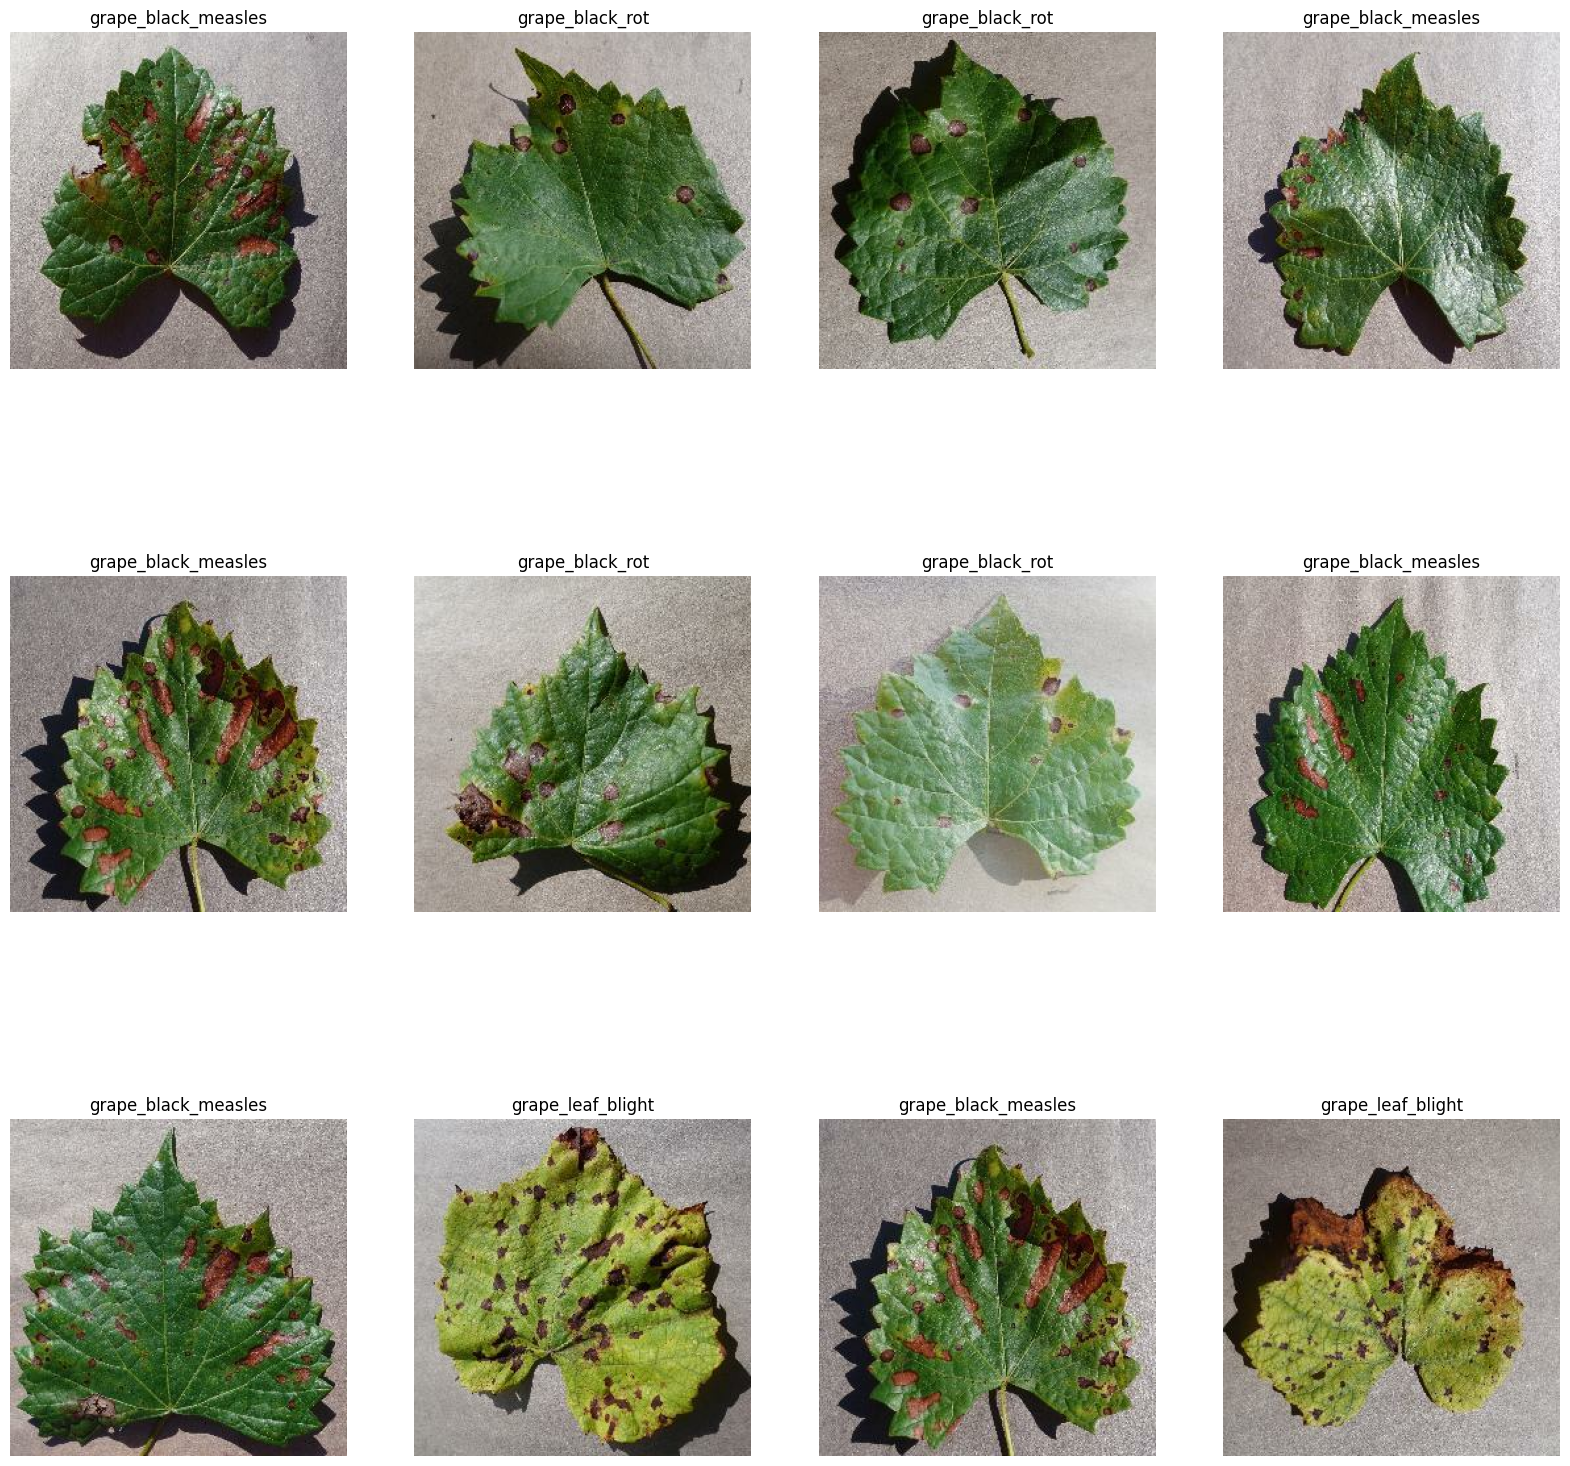

In [12]:
# display 12 images 
plt.figure(figsize=(20,20))
for image_batch, label_batch in df.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_name[label_batch[i]])
        plt.axis('off')

In the images above, we can observe distinct differences between the diseases. <br>
<br>
Healthy grape leaves retain their vibrant green color with no visible signs of rot. Grape_leaf_measels maintains the vibrant green color, but the rot appears in long patterns with connections to other rotting parts. Grape_leaf_rot looks similar to grape_leaf_measels. However, the rot is more circular and and tends to spread in a more uniform way. Grape_leaf_blight appears the easiest to classify as the leaf looses its green color and turns yellowish making it visually different from the others.

### 3.3 Class Distribution

In [9]:
# store labels from df as list
labels = []
for _, label in df:
    labels.extend(label.numpy())

In [10]:
# count images in each class
class_counts = Counter(labels)

# convert to dataframe for sns
class_distribution = pd.DataFrame({
    'Class': list(class_counts.keys()),
    'Count': list(class_counts.values())
})

label_mapping = {
    0: 'Black Measles',
    1: 'Black Rot',
    2: 'Healthy',
    3: 'Leaf Blight'
}
class_distribution['Class'] = class_distribution['Class'].replace(label_mapping)

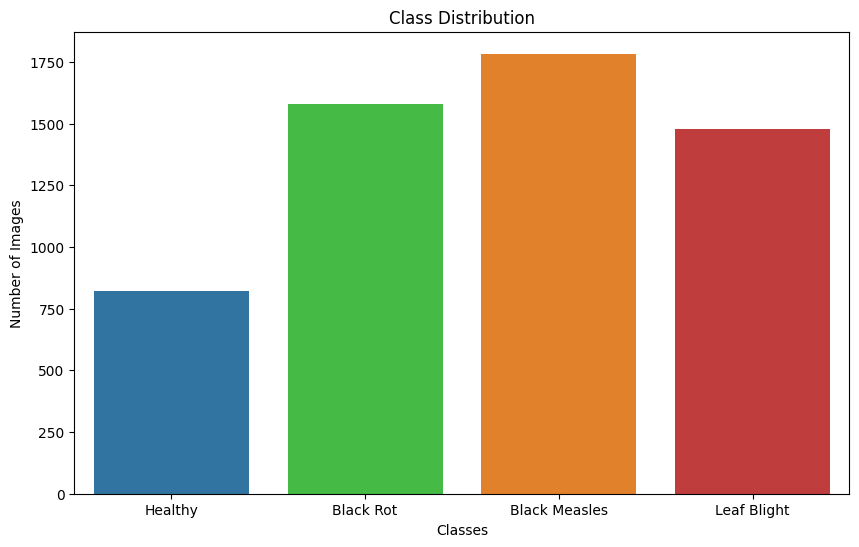

In [11]:
# plot barchart
custom_palette = ['#1f77b4', '#32CD32', '#ff7f0e', '#d62728']
plt.figure(figsize=(10, 6))
sns.barplot(data=class_distribution, x='Class', y='Count', palette=custom_palette, hue='Class')
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Class Distribution')
plt.xticks()
plt.show()

This bar chart represents the class distribution of images in the dataset. <br>
<br>
The dataset is imbalanced, with significantly fewer healthy images compared to the diseased classes. This imbalance might affect model performance, as it may become biased toward the majority classes (Black Measles and Black Rot).<br>
<br>
To address this, I plan to apply class weighting during training to ensure more balanced model learning.<br>

### 3.4 Image Sizes 

In [12]:
# save image sizes to lists
image_heights = []
image_widths = []

for images, labels in df:
    for img in images:
        height, width = img.shape[0], img.shape[1]
        image_heights.append(height)
        image_widths.append(width)

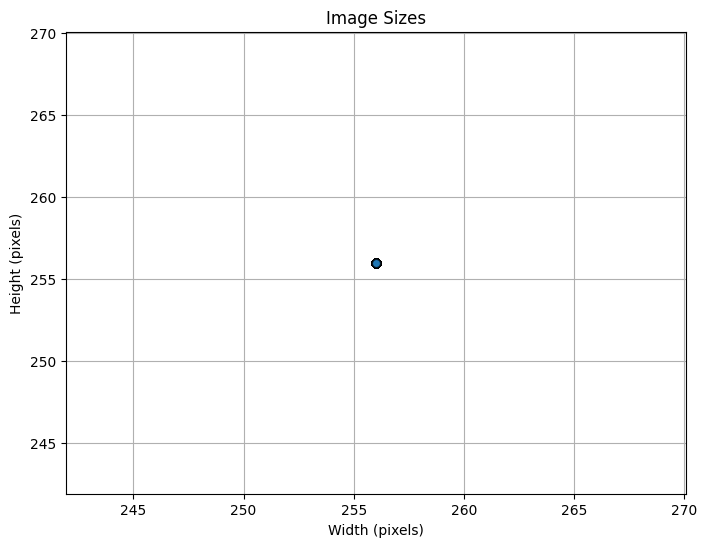

In [13]:
# plot image sizes
plt.figure(figsize=(8, 6))
plt.scatter(image_widths, image_heights, alpha=0.6, edgecolor='k')
plt.title('Image Sizes')
plt.xlabel('Width (pixels)')
plt.ylabel('Height (pixels)')
plt.grid(True)
plt.show()

The scatterplot above shows that all images are the same size

### 3.5 Color Distribution

In [14]:
# store image RGB in (Red, Green, Blue) lists
data_iter = iter(df)

red = []
green = []
blue = []

for _ in range(100):
    images, _ = next(data_iter)
    images = tf.convert_to_tensor(images)
    
    red.append(images[:, :, :, 0].numpy().flatten())
    green.append(images[:, :, :, 1].numpy().flatten())
    blue.append(images[:, :, :, 2].numpy().flatten())

red = np.concatenate(red)
green = np.concatenate(green)
blue = np.concatenate(blue)

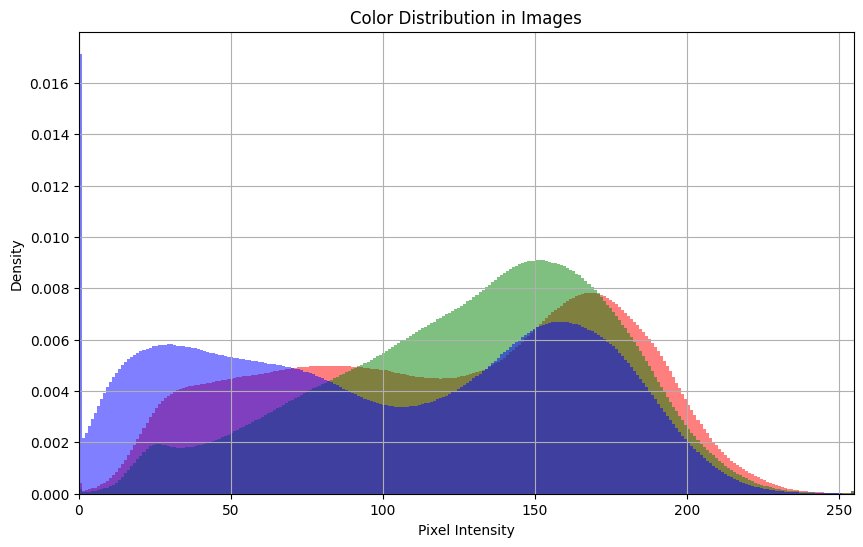

CPU times: total: 4.38 s
Wall time: 9.65 s


In [15]:
%%time
# plot color distribution
plt.figure(figsize=(10, 6))
plt.hist(red, bins=256, color='red', alpha=0.5, label='Red', density=True)
plt.hist(green, bins=256, color='green', alpha=0.5, label='Green', density=True)
plt.hist(blue, bins=256, color='blue', alpha=0.5, label='Blue', density=True)
plt.title('Color Distribution in Images')
plt.xlabel('Pixel Intensity')
plt.ylabel('Density')
plt.xlim(0, 255)
plt.grid()
plt.show()

The graph shows a broad distribution of pixel intensities across colors. <br>
<br>
The large blue bar on the left shows that a large proportion of the pixels across the images have a blue intensity of 0. which corresponds to the absence or very minimal presence of blue in those pixels.<br>
<br>
Since there isn't a narrow concentration of values, adding random brightness and contrast adjustments may not be necessary. However, I plan to test the model both with and without these augmentations to determine which approach provides better results.<br>

### 3.6 Color Distribution By Class

In [16]:
grape_black_measles = tf.keras.preprocessing.image_dataset_from_directory('Data/grape_black_measles', shuffle=True, batch_size=batch_size, seed=42, label_mode=None)
grape_black_rot = tf.keras.preprocessing.image_dataset_from_directory('Data/grape_black_rot', shuffle=True, batch_size=batch_size, seed=42, label_mode=None)
grape_healthy = tf.keras.preprocessing.image_dataset_from_directory('Data/grape_healthy', shuffle=True, batch_size=batch_size, seed=42, label_mode=None)
grape_leaf_blight = tf.keras.preprocessing.image_dataset_from_directory('Data/grape_leaf_blight', shuffle=True, batch_size=batch_size, seed=42, label_mode=None)

Found 1783 files belonging to 1 classes.
Found 1579 files belonging to 1 classes.
Found 823 files belonging to 1 classes.
Found 1476 files belonging to 1 classes.


In [17]:
def RGB(df, range_, name):
    red = []
    green = []
    blue = []

    data_iter = iter(df)

    for _ in range(range_):
        images = next(data_iter)
        images = tf.convert_to_tensor(images)
    
        red.append(images[:, :, :, 0].numpy().flatten())
        green.append(images[:, :, :, 1].numpy().flatten())
        blue.append(images[:, :, :, 2].numpy().flatten())

    red = np.concatenate(red)
    green = np.concatenate(green)
    blue = np.concatenate(blue)

    plt.figure(figsize=(10, 6))
    plt.hist(red, bins=256, color='red', alpha=0.5, label='Red', density=True)
    plt.hist(green, bins=256, color='green', alpha=0.5, label='Green', density=True)
    plt.hist(blue, bins=256, color='blue', alpha=0.5, label='Blue', density=True)
    plt.title(f'Color Distribution in {name}')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Density')
    plt.xlim(0, 255)
    plt.grid(True)
    plt.legend()
    plt.show()

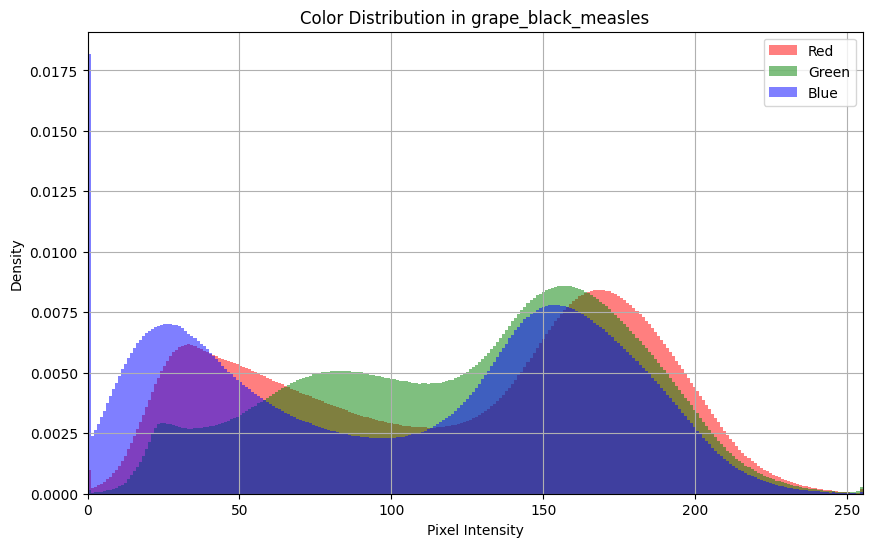

In [18]:
RGB(grape_black_measles, len(grape_black_measles), 'grape_black_measles')

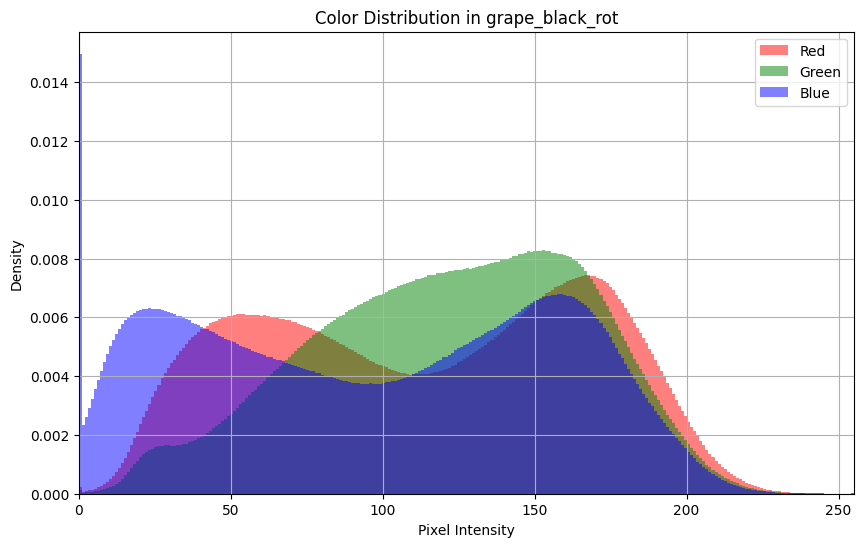

In [19]:
RGB(grape_black_rot, len(grape_black_rot), 'grape_black_rot')

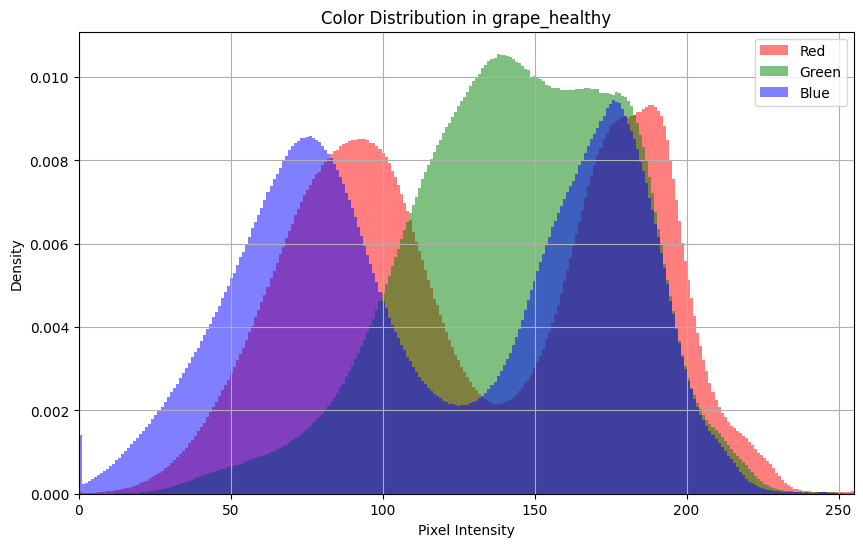

In [20]:
RGB(grape_healthy, len(grape_healthy), 'grape_healthy')

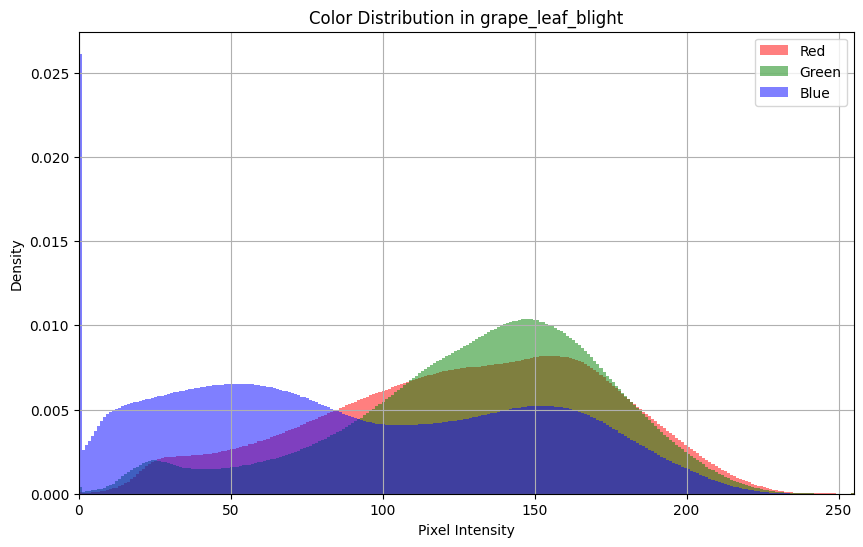

In [21]:
RGB(grape_leaf_blight, len(grape_leaf_blight), 'grape_leaf_blight')

These four histograms show a clear distinction between healthy and diseased plants, with the most significant indicator being the blue pixel intensity. <br>
<br>
The 3 types of diseased plants show a high concentration of low blue values, particularly between pixel intensities of 0 and 50. Where as the histogram of healthy plants shows a noticeably lower frequency of blue values in this range. <br>

Among the three types of diseased plants, 'grape_leaf_blight' shows a much lower number of low pixel intensity red values. This sets it apart from the other diseases, where low red pixel intensities are more common.

## 4. Train Test Split

### 4.1 Structure

**Training** = 80% <br>
**Validation** = 10% <br>
**Testing** = 10%

### 4.2 Split

In [22]:
# training data 
train_size = int(len(df)*0.8)
train = df.take(train_size)
print(len(train)) # 141 batches -> 4512 images

141


In [23]:
# validation data
validation_size = int(len(df)*0.1)
validation = df.skip(141)
validation = validation.take(validation_size)
print(len(validation)) # 17 batches -> 544 images

17


In [24]:
# test data
test = df.skip(141+17)
print(len(test)) # 17 batches -> 608 images

19


## 5. PreProcessing Pipelines

### 5.1 Sizing and Normalizing

In [25]:
# ensure images are 265x265 and normalised
resize_rescale = tf.keras.Sequential([
    layers.Resizing(image_size, image_size), # ensure all future images are 256x256
    layers.Rescaling(1.0/255) # normalize data
])

### 5.2 Data Augmentation 

In [26]:
# ensure model learns from different orientations
random_orientations = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.25)
])

In [27]:
# ensure model learns from different lighting conditions
lighting = tf.keras.Sequential([
    layers.RandomBrightness(0.25)
])

## 6. Save TFRecords

### 6.1 Save Train, Validation, Test

In [ ]:
# save to folders
save_dir = 'datasets/'
datasets = {'train': train, 'validation': validation, 'test': test}
for name, dataset in datasets.items():
    tf.data.experimental.save(dataset, f'{save_dir}{name}')

## References

**Plant Village** <br>
@article{DBLP:journals/corr/HughesS15<br>
  author    = David P. Hughes and Marcel Salath<br>
  title     = An open access repository of images on plant health to enable the development of mobile disease diagnostics through machine learning and crowdsourcing<br>
  journal   = CoRR<br>
  volume    = abs/1511.08060<br>
  year      = 2015<br>
  url       = http://arxiv.org/abs/1511.08060<br>
  archivePrefix = arXiv<br>
  eprint    = 1511.08060<br>
  timestamp = Mon, 13 Aug 2018 16:48:21 +0200<br>
  biburl    = https://dblp.org/rec/bib/journals/corr/HughesS15<br>
  bibsource = dblp computer science bibliography, https://dblp.org<br>

**Grape 400**<br>
author = Khan, Murtaza<br>
title = Healthy and Disease affected Leaves of Grape Plant<br>
year = 2020<br>
Dataset = https://doi.org/10.6084/m9.figshare.13083890.v1<br>

**ESCA** <br>
author = Alessandrini Michele, Calero Fuentes, Rivera Romel, Falaschetti Laura, Pau Danilo, Tomaselli Valeria, Turchetti Claudio<br>
title = ESCA-dataset<br>
year = 2021 <br>
Mendeley Data, V1, doi: 10.17632/89cnxc58kj.1<br>